In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Real estate valuation data set.csv')

dframe = pd.DataFrame(data)
print(dframe)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [39]:
dframe = data.drop_duplicates()
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [40]:
dropped = dframe.dropna()
dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [44]:
X = data['X2 house age'].values.reshape(-1,1)
y = data['Y house price of unit area']

#shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (414, 1)
Shape of y: (414,)


In [51]:
#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (331, 1)
Shape of X_test: (83, 1)
Shape of y_train: (331,)
Shape of y_test: (83,)


In [46]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmae = np.sqrt(mae)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)
print("Mean Absolute Error: ", mae)
print("Root Mean Absolute Error: ", rmae)

Mean Squared Error (MSE): 165.2051150828318
R-squared (R^2) Score: 0.015227904910820378
Mean Absolute Error:  10.621234812005051
Root Mean Absolute Error:  3.259023597951548


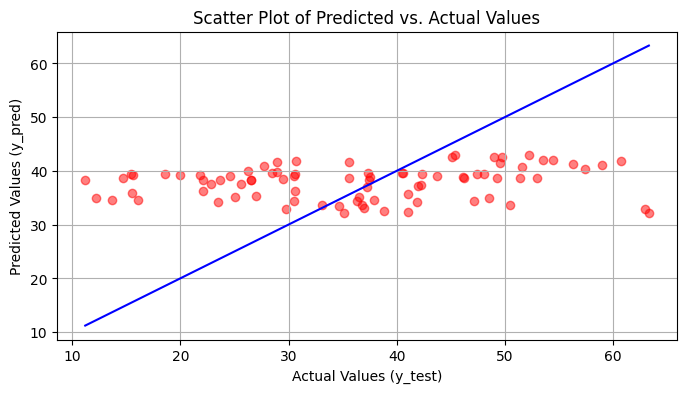

In [47]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='-')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.show()